# 1. Data preparation

Once we have organized and provided a new structure to our dataset is time to get some good insight on our information. To achieve this, we will implement an exploratory analysis aiming to understand how people in NYC travel. We will conduct out exploratory analysis in three main directions:
*	Location based features
*	Time/Distance based analysis 
*	Analysis of weather conditions



## 1.1 Import Libraries 

In [2]:
library(data.table, quietly = TRUE, warn.conflicts = FALSE) # for fast data processing
library(dplyr) # data manipulation
library(ggplot2) #data visualization
library(ggmap)
library(RColorBrewer)
library(lubridate)
library(chron) #handling of dates
library(rgdal, quietly = TRUE, warn.conflicts = FALSE) 
library(scales)

## 1.2 Helper functions

In [3]:
library(grid)
multiplot <- function(..., plotlist=NULL, file, cols=1, layout=NULL) {
  plots <- c(list(...), plotlist)
  numPlots = length(plots)
  if (is.null(layout)) {
    layout <- matrix(seq(1, cols * ceiling(numPlots/cols)), ncol = cols, nrow = ceiling(numPlots/cols))
  }

 if (numPlots==1) {
    print(plots[[1]])
  } else {
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))

    for (i in 1:numPlots) {
      matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))

      print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,layout.pos.col = matchidx$col))
    }
  }
}

## 1.3 Import data

In [4]:
data <- fread('c:/datasets/NYCtaxi_cleaned_data.csv', sep=",", stringsAsFactors=F)

data <- data %>%
  mutate_at("pickup_county", funs(as.factor)) %>% 
  mutate_at("dropoff_county", funs(as.factor)) %>% 
  mutate_at("dataset", funs(as.factor)) %>% 
  mutate_at("holiday", funs(as.factor)) %>% 
  mutate(date         = date(date), 
         weekday      = lubridate::wday(date, label=TRUE),
         weekend      = is.weekend(date),
         month        = month(date, label = TRUE, abbr = FALSE))

str(data)

Read 1815361 rows and 25 (of 25) columns from 0.324 GB file in 00:00:14
'data.frame':	1815361 obs. of  25 variables:
 $ passenger_count     : int  1 1 1 1 1 4 1 1 1 4 ...
 $ pickup_longitude    : num  -74 -74 -74 -74 -74 ...
 $ pickup_latitude     : num  40.8 40.7 40.8 40.7 40.8 ...
 $ pickup_county       : Factor w/ 5 levels "Bronx","Hudson",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ dropoff_longitude   : num  -74 -74 -74 -74 -74 ...
 $ dropoff_latitude    : num  40.8 40.7 40.7 40.7 40.8 ...
 $ dropoff_county      : Factor w/ 5 levels "Bronx","Hudson",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ trip_duration       : int  455 663 2124 429 435 341 255 1225 1274 1128 ...
 $ dataset             : Factor w/ 2 levels "test","train": 2 2 2 2 2 2 2 2 2 2 ...
 $ pickup_neighborhood : chr  "Midtown" "Gramercy" "Midtown" "Tribeca" ...
 $ dropoff_neighborhood: chr  "Upper East Side" "Greenwich Village" "Financial District" "Financial District" ...
 $ dist                : num  1.5 1.81 6.39 1.49 1.19 1.33 1.31 5.13 3.81 

In [9]:
## RUN THIS CELL TO FILTER ROWS FOR TESTING PURPOSES
data <- sample_n(data, 10000)

# 2. Location
## 2.1 Heatmap

In order to have a quick understanding of the request patterns of taxi fares in the city we will implement heat maps. Figure 4.1 shows the request locations and dropoff destinations throughout the four counties in the early part of the day (8-13h), afternoon (16-20h), and evening (22-3h). The taxi companies on this dataset are mainly based in Manhattan, and this is clearly reflected in the heatmaps

Warning message:
"`panel.margin` is deprecated. Please use `panel.spacing` property instead"Warning message:
"`panel.margin` is deprecated. Please use `panel.spacing` property instead"Warning message:
"`panel.margin` is deprecated. Please use `panel.spacing` property instead"Warning message:
"`panel.margin` is deprecated. Please use `panel.spacing` property instead"Warning message:
"`panel.margin` is deprecated. Please use `panel.spacing` property instead"Warning message:
"`panel.margin` is deprecated. Please use `panel.spacing` property instead"Warning message:
"Removed 3067 rows containing non-finite values (stat_density2d)."Warning message:
"Removed 3678 rows containing non-finite values (stat_density2d)."Warning message:
"Removed 4814 rows containing non-finite values (stat_density2d)."Warning message:
"Removed 4618 rows containing non-finite values (stat_density2d)."Warning message:
"Removed 8241 rows containing non-finite values (stat_density2d)."Warning message:
"Removed 17021 r

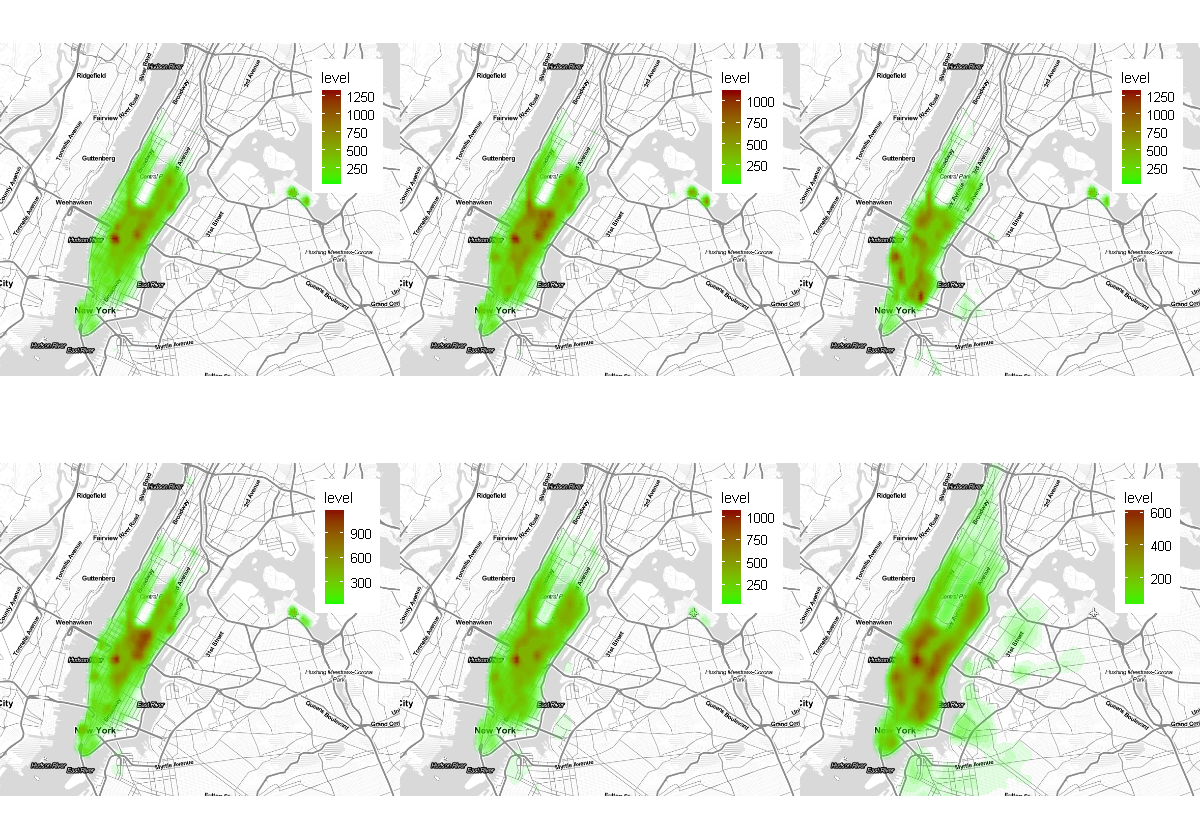

In [357]:
options(repr.plot.width=3, repr.plot.height=3)

box <- c(left = -74.07, bottom = 40.68, right = -73.8, top = 40.85)
map <- get_stamenmap(box, zoom = 12, maptype = "toner-lite")

downcolor = "green"

p1 <-ggmap(map, extent = "device") +
         stat_density2d(data=data %>% filter(hour >=8 & hour <=13),
         aes(x = pickup_longitude, y = pickup_latitude, fill = ..level.., alpha = ..level..), size = 1,
         bins = 50, geom = "polygon") +
         scale_fill_gradient(low = downcolor, high = "darkred") +
         scale_alpha(range = c(0.1, 1), guide = FALSE) +
         theme(legend.position=c(0.87, 0.75),legend.title=element_text(size=9),legend.text=element_text(size=8),legend.key.size = unit(.4, "cm"))
    
p2 <-ggmap(map, extent = "device") +
         stat_density2d(data=data %>% filter(hour >=16 & hour <=20),
         aes(x = pickup_longitude, y = pickup_latitude, fill = ..level.., alpha = ..level..), size = 1,
         bins = 50, geom = "polygon") +
         scale_fill_gradient(low = downcolor, high = "darkred") +
         scale_alpha(range = c(0.1, 1), guide = FALSE) +
         theme(legend.position=c(0.87, 0.75),legend.title=element_text(size=9),legend.text=element_text(size=8),legend.key.size = unit(.4, "cm"))

p3 <-ggmap(map, extent = "device") +
         stat_density2d(data=data %>% filter(hour >=22 & hour <=24 | hour >=0 & hour <=3 ),
         aes(x = pickup_longitude, y = pickup_latitude, fill = ..level.., alpha = ..level..), size = 1,
         bins = 50, geom = "polygon") +
         scale_fill_gradient(low = downcolor, high = "darkred") +
         scale_alpha(range = c(0.1, 1), guide = FALSE) +
         theme(legend.position=c(0.87, 0.75),legend.title=element_text(size=9),legend.text=element_text(size=8),legend.key.size = unit(.4, "cm"))

p4 <-ggmap(map, extent = "device") +
         stat_density2d(data=data %>% filter(hour >=8 & hour <=13),
         aes(x = dropoff_longitude, y = dropoff_latitude, fill = ..level.., alpha = ..level..), size = 1,
         bins = 50, geom = "polygon") +
         scale_fill_gradient(low = downcolor, high = "darkred") +
         scale_alpha(range = c(0.1, 1), guide = FALSE) +
         theme(legend.position=c(0.87, 0.75),legend.title=element_text(size=9),legend.text=element_text(size=8),legend.key.size = unit(.4, "cm"))
    
p5 <-ggmap(map, extent = "device") +
         stat_density2d(data=data %>% filter(hour >=16 & hour <=20),
         aes(x = dropoff_longitude, y = dropoff_latitude, fill = ..level.., alpha = ..level..), size = 1,
         bins = 50, geom = "polygon") +
         scale_fill_gradient(low = downcolor, high = "darkred") +
         scale_alpha(range = c(0.1, 1), guide = FALSE) +
         theme(legend.position=c(0.87, 0.75),legend.title=element_text(size=9),legend.text=element_text(size=8),legend.key.size = unit(.4, "cm"))

p6 <-ggmap(map, extent = "device") +
         stat_density2d(data=data %>% filter(hour >=22 & hour <=24 | hour >=0 & hour <=3 ),
         aes(x = dropoff_longitude, y = dropoff_latitude, fill = ..level.., alpha = ..level..), size = 1,
         bins = 50, geom = "polygon") +
         scale_fill_gradient(low = downcolor, high = "darkred") +
         scale_alpha(range = c(0.1, 1), guide = FALSE) +
         theme(legend.position=c(0.87, 0.75),legend.title=element_text(size=9),legend.text=element_text(size=8),legend.key.size = unit(.4, "cm"))



options(repr.plot.width=10, repr.plot.height=7) #Graph sizing in jupyter,for rstudio is not required
layout <- matrix(c(1,2,3,4,5,6),2,3,byrow=TRUE)
multiplot(p1,p2,p3,p4,p5,p6, layout=layout)


## 2.2 Trip duration per neighborhood
Once we understand that most of the taxi requests come from the city of New York, our next step is to have a quick grasp of where those trips are going and how long it takes for taxis to arrive at the destination. From figure 4.2 we can derive that most of the trips within the city happen under the 15 minutes mark. This timeframe is ideal for the e-Trike capabilities given the autonomy constraints. Going beyond the city borders might be likely, but considering the traffic regulations and the probability of accidents on higher speed roads, it might be better to avoid these destinations. In addition, it is clear in this graph that neighborhoods further away from Manhattan take longer, as it might be expected given that the origin is usually in Manhattan.

In [6]:
# Import neighborhood data
ny.map <- readOGR("c:/datasets/ZillowNeighborhoods-NY.shp", layer = "ZillowNeighborhoods-NY")
neighborhoods <- ny.map[ny.map$City == c("New York"), ]

# Subset only the target neighborhoods
counties = c("New York","Queens","Kings","Bronx")
m <- neighborhoods[neighborhoods$County %in% counties,]

#  Conver from SpatialPolygonsDataFrame to r dataframe
ny.f = m %>% fortify(region = 'Name')
NY.n  = merge(ny.f, m@data, by.x = 'id', by.y = 'Name')

# Create the target value to be analysed
values <-data  %>%
    filter(dataset == "train") %>%
    group_by(dropoff_neighborhood) %>%
    summarise(duration = round(mean(trip_duration)/60,0))  

# Join the values with the coordinate dataframe
values <- inner_join(NY.n , values, by = c("id"="dropoff_neighborhood"))

OGR data source with driver: ESRI Shapefile 
Source: "c:/datasets/ZillowNeighborhoods-NY.shp", layer: "ZillowNeighborhoods-NY"
with 579 features
It has 5 fields


Warning message:
"`panel.margin` is deprecated. Please use `panel.spacing` property instead"

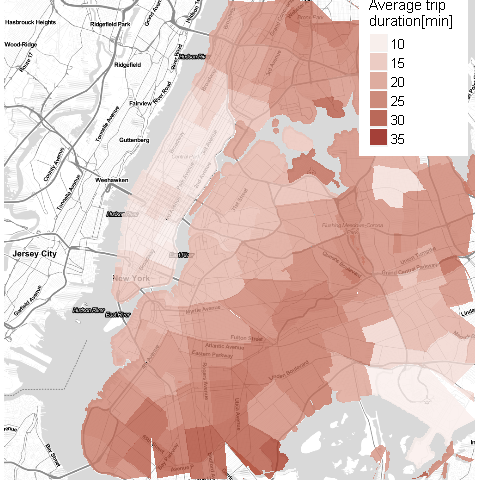

In [8]:
options(repr.plot.width=4, repr.plot.height=4)

box <- c(left = -74.1, bottom = 40.6, right = -73.75, top = 40.87)
map <- get_stamenmap(box, zoom = 12, maptype = "toner-lite")


ggmap(map, extent = "device") +
    geom_polygon(aes(fill = duration, x = long, y = lat, group = group), data = values, alpha = 0.8, color = NA) +
    scale_fill_gradient(low="white", high="darkred") +
    guides(fill=guide_legend(title="Average trip\nduration[min]",title.hjust = 0)) +
    theme(legend.position=c(0.87, 0.85),legend.title=element_text(size=9),legend.text=element_text(size=8),legend.key.size = unit(.4, "cm"))
    


In [11]:
str(data %>% filter(pickup_county == "New York" & dropoff_county=="New York"))
1593879/18100000

'data.frame':	1593879 obs. of  25 variables:
 $ passenger_count     : int  1 1 1 1 1 4 1 1 1 4 ...
 $ pickup_longitude    : num  -74 -74 -74 -74 -74 ...
 $ pickup_latitude     : num  40.8 40.7 40.8 40.7 40.8 ...
 $ pickup_county       : Factor w/ 5 levels "Bronx","Hudson",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ dropoff_longitude   : num  -74 -74 -74 -74 -74 ...
 $ dropoff_latitude    : num  40.8 40.7 40.7 40.7 40.8 ...
 $ dropoff_county      : Factor w/ 5 levels "Bronx","Hudson",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ trip_duration       : int  455 663 2124 429 435 341 255 1225 1274 1128 ...
 $ dataset             : Factor w/ 2 levels "test","train": 2 2 2 2 2 2 2 2 2 2 ...
 $ pickup_neighborhood : chr  "Midtown" "Gramercy" "Midtown" "Tribeca" ...
 $ dropoff_neighborhood: chr  "Upper East Side" "Greenwich Village" "Financial District" "Financial District" ...
 $ dist                : num  1.5 1.81 6.39 1.49 1.19 1.33 1.31 5.13 3.81 3.78 ...
 $ speed               : num  11.87 9.83 10.83 12.5 9.85 ...
 $

[1] 0.08805961

In [12]:
# Import neighborhood data
ny.map <- readOGR("c:/datasets/ZillowNeighborhoods-NY.shp", layer = "ZillowNeighborhoods-NY")
neighborhoods <- ny.map[ny.map$City == c("New York"), ]

# Subset only the target neighborhoods
counties = c("New York","Queens","Kings","Bronx")
m <- neighborhoods[neighborhoods$County %in% counties,]

#  Conver from SpatialPolygonsDataFrame to r dataframe
ny.f = m %>% fortify(region = 'Name')
NY.n  = merge(ny.f, m@data, by.x = 'id', by.y = 'Name')

# Create the target value to be analysed
values <-data  %>%
    filter(dataset == "train" & pickup_county == "New York" & dropoff_county=="New York" ) %>%
    group_by(dropoff_neighborhood) %>%
    summarise(duration = round(mean(trip_duration)/60,0))  

# Join the values with the coordinate dataframe
values <- inner_join(NY.n , values, by = c("id"="dropoff_neighborhood"))

OGR data source with driver: ESRI Shapefile 
Source: "c:/datasets/ZillowNeighborhoods-NY.shp", layer: "ZillowNeighborhoods-NY"
with 579 features
It has 5 fields


Warning message:
"`panel.margin` is deprecated. Please use `panel.spacing` property instead"

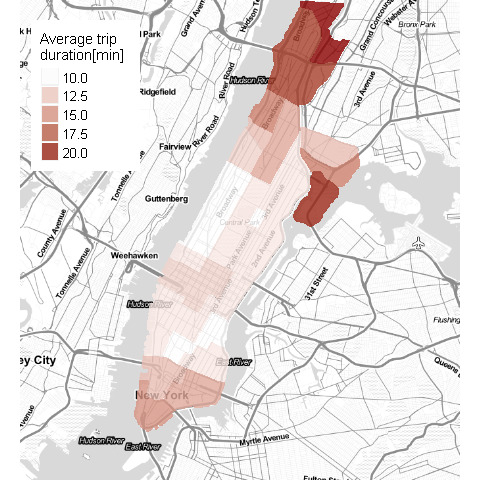

In [18]:
options(repr.plot.width=4, repr.plot.height=4)

box <- c(left = -74.08, bottom = 40.68, right = -73.85, top = 40.87)
map <- get_stamenmap(box, zoom = 12, maptype = "toner-lite")


ggmap(map, extent = "device") +
    geom_polygon(aes(fill = duration, x = long, y = lat, group = group), data = values, alpha = 0.8, color = NA) +
    scale_fill_gradient(low="white", high="darkred") +
    guides(fill=guide_legend(title="Average trip\nduration[min]",title.hjust = 0)) +
    theme(legend.position=c(0.15, 0.8),legend.title=element_text(size=9),legend.text=element_text(size=8),legend.key.size = unit(.4, "cm"))
    


In [19]:
data <-data  %>%
    filter(pickup_county == "New York" & dropoff_county=="New York" ) 

## 2.3 Speed per neighborhood
Furthermore, it is imperative to assess the speed patterns of the city to determine the feasibility of the e-Trike as a taxi service provider in New York City. Figure 4.3 shows the distribution of the average speed of all the Taxi services. It is important to consider that the calculated speed is an underestimation of the real speed since the calculation of velocity was based on linear distance instead of block distance.  New York city layout follows a pattern of blocks.  It is, therefore, safe to assume that the real velocity will never be more than double calculated distance, based on simple rules of trigonometry. Most of the taxi services calculated speed are between 15 and 25 km/h which can be easily met by the e-trike which has a max speed of 55 km/h

In [28]:
# Import neighborhood data
ny.map <- readOGR("c:/datasets/ZillowNeighborhoods-NY.shp", layer = "ZillowNeighborhoods-NY")
neighborhoods <- ny.map[ny.map$City == c("New York"), ]

# Subset only the target neighborhoods
counties = c("New York","Queens","Kings","Bronx")
m <- neighborhoods[neighborhoods$County %in% counties,]

#  Conver from SpatialPolygonsDataFrame to r dataframe
ny.f = m %>% fortify(region = 'Name')
NY.n  = merge(ny.f, m@data, by.x = 'id', by.y = 'Name')

# Create the target value to be analysed
values <-data  %>%
    filter(dataset == "train") %>%
    group_by(dropoff_neighborhood) %>%
    summarise(speed = mean(speed))  %>% 
    filter(speed > 10)  

# Join the values with the coordinate dataframe
values <- inner_join(NY.n , values, by = c("id"="dropoff_neighborhood"))

OGR data source with driver: ESRI Shapefile 
Source: "c:/datasets/ZillowNeighborhoods-NY.shp", layer: "ZillowNeighborhoods-NY"
with 579 features
It has 5 fields


Warning message:
"`panel.margin` is deprecated. Please use `panel.spacing` property instead"

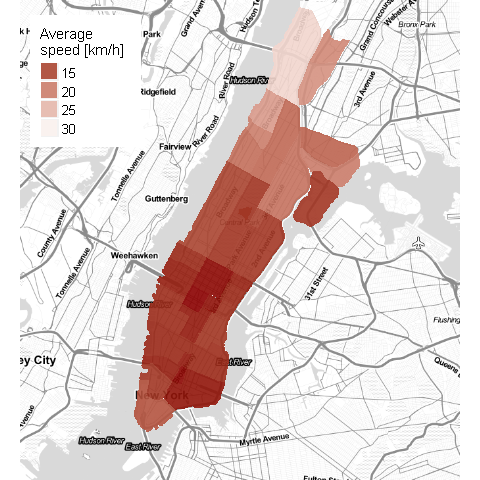

In [32]:
options(repr.plot.width=4, repr.plot.height=4)

box <- c(left = -74.08, bottom = 40.68, right = -73.85, top = 40.87)
map <- get_stamenmap(box, zoom = 12, maptype = "toner-lite")

ggmap(map, extent = "device") +
    geom_polygon(aes(fill = speed, x = long, y = lat, group = group), data = values, alpha = 0.9, color = NA) +
    scale_fill_gradient(low="darkred", high ="white") +
    guides(fill=guide_legend(title="Average \nspeed [km/h]",title.hjust = 0)) +
    theme(legend.position=c(0.15, 0.83),legend.title=element_text(size=9),legend.text=element_text(size=8),legend.key.size = unit(.4, "cm"))
    


# 3. Time related variables

## 3.1 Count vs Day 
In a month by month perspective (figure 4.8), taxi services tend to be relatively steady within the months presented in the data. In the first semester of 2016 March and April were the busiest months. But not by a large margin. On a day to day basis the taxi request distribution also behaves relatively steady (figure 4.7) with three main exceptions:

    a)	At the beginning of the year, people took time to reincorporate to their activities.
    b)	The great blizzard of January 2016 (will be further explained in section 3.3)
    c)	The Labor Day holiday (May,30th) which was the first public holiday of the year after January 1st.


Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"k-d tree limited by memory. ncmax= 200"Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
"k-d tree limited by memory. ncmax= 200"

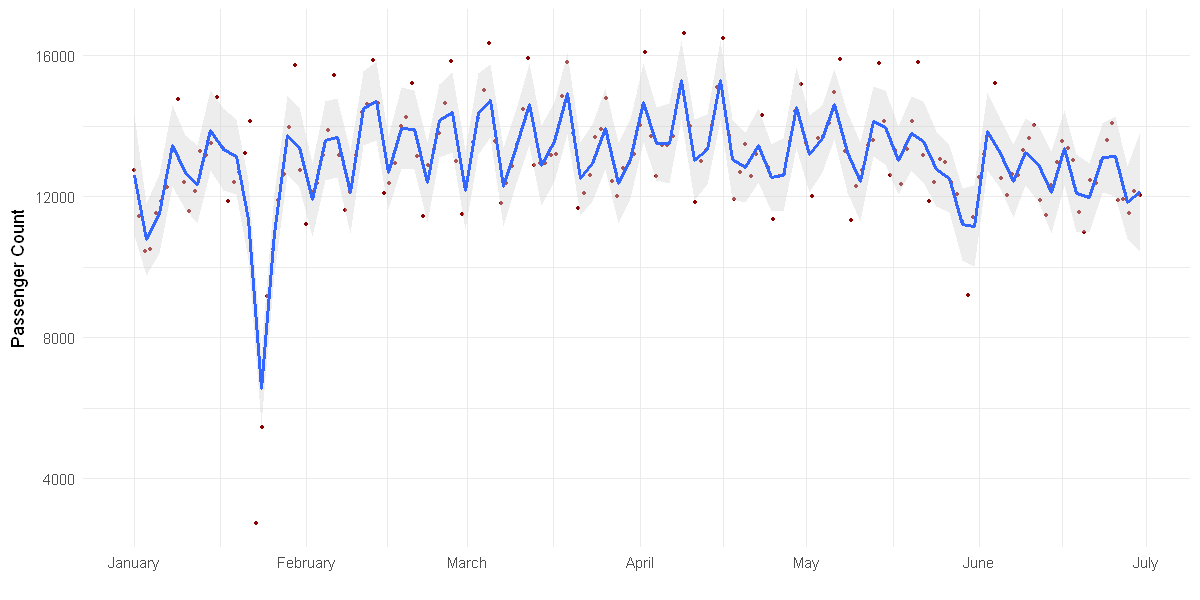

In [313]:
options(repr.plot.width=10, repr.plot.height=5)

data %>%
  group_by(date) %>%
  summarise(pc = sum(passenger_count))%>%
  ggplot(aes(date,pc)) +
  scale_x_date(date_breaks = "1 month",  
               labels = date_format("%B")) +
  geom_point(size=0.75,color="darkred") +
  geom_smooth(method = "loess", span = .05, fill="lightgray") + 
  theme_minimal() +
  theme(legend.position = "none", axis.title = element_text(size=10.5))+
  labs(x = "", y = "Passenger Count") 
  

## 3.2 Count vs Day of the week
In a month by month perspective (figure 4.8), taxi services tend to be relatively steady within the months presented in the data. 

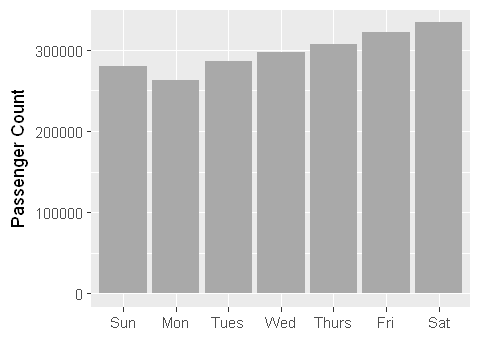

In [35]:
options(repr.plot.width=4, repr.plot.height=3, scipen=10000)

data %>%
    group_by(weekday) %>%
    summarise(pc = sum(passenger_count))%>%
    ggplot( aes(x=weekday, y=pc)) +
    geom_bar(stat="identity", fill="darkgray")+
    labs(x="", y="Passenger Count") +
    theme(axis.title = element_text(size=10.5)) 


## 3.3 Passenger count vs hour of the day

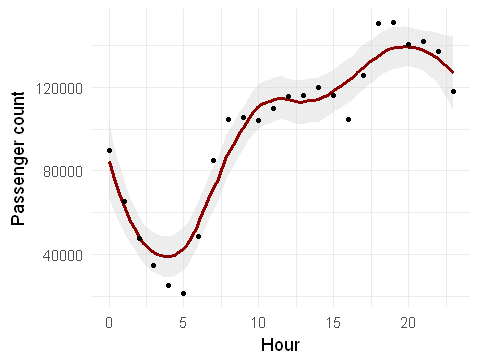

In [316]:
options(repr.plot.width=4, repr.plot.height=3)

data %>%
    group_by(hour)%>%
    summarise(pc = sum(passenger_count))%>%
    ggplot(aes(hour, pc)) + 
    theme_minimal() +
    geom_smooth(method = "loess", span = .6,color="darkred",, fill="lightgray") +
    geom_point(size = 1) +
    labs(x = "Hour", y = "Passenger count") +
    theme(legend.position = "none")

 

## 3.4 Passenger count vs hour/day

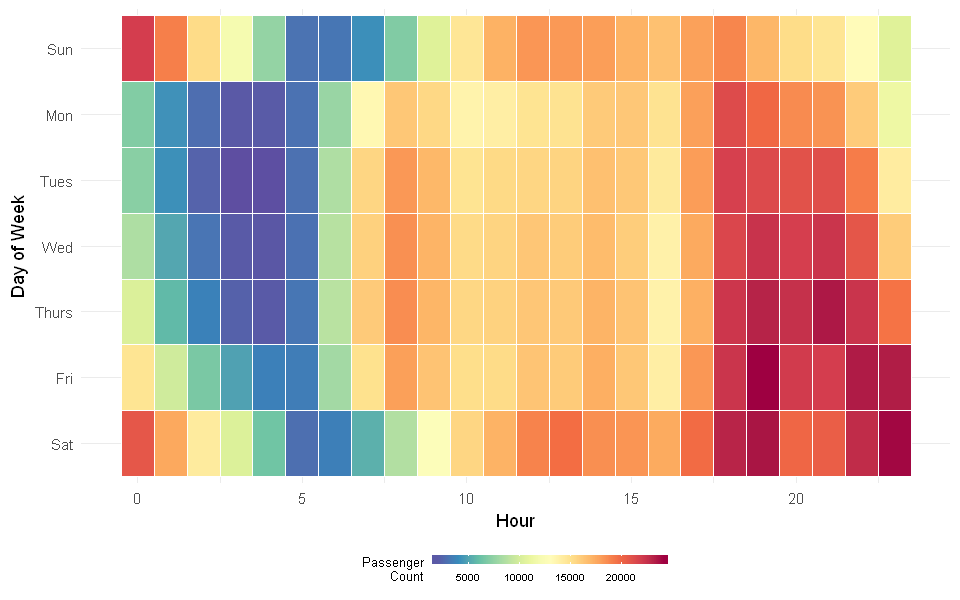

In [317]:
options(repr.plot.width=8, repr.plot.height=5) #Graph sizing in jupyter,for rstudio is not required

hm_palette <- colorRampPalette(rev(brewer.pal(11, 'Spectral')), space='Lab')  

data %>% 
    group_by(weekday, hour) %>% 
    summarise(passenger_count=sum(passenger_count, na.rm=TRUE)) %>%  
    mutate(wd =  factor(weekday, levels = c("Sat", "Fri", "Thurs", "Wed", "Tues", "Mon", "Sun"))) %>%
    arrange(wd) %>%
    ggplot(aes(x=hour, y=wd)) +
    geom_tile(aes(fill=passenger_count), colour="white") + 
    scale_fill_gradientn(colours=hm_palette(100)) +
    labs(x="Hour", y="Day of Week",fill="Passenger\nCount") +
    theme_minimal() +
    theme(legend.title=element_text(size=8),
        legend.title.align=1,
        legend.text=element_text(size=6),
        legend.position="bottom",
        legend.key.size=unit(0.2, "cm"),
        legend.key.width=unit(1, "cm"))

## 3.5 Count vs Month 

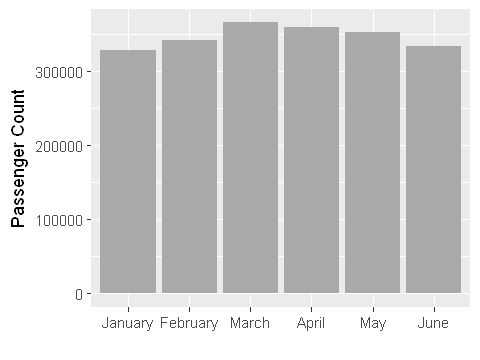

In [38]:
options(repr.plot.width=4, repr.plot.height=3)

data %>%
    group_by(month) %>%
    summarise(pc = sum(passenger_count))%>%
    ggplot( aes(x=month, y=pc)) +
    geom_bar(stat="identity", fill="darkgray")+
    labs(x="", y="Passenger Count") +
    theme(axis.title = element_text(size=10.5)) 


# 4. Trip duration

## 4.1 Trip duration vs Distance

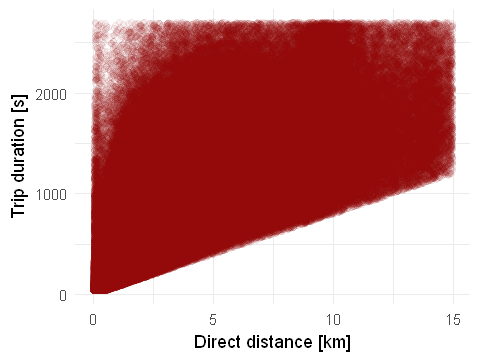

In [7]:
options(repr.plot.width=4, repr.plot.height=3)

data %>%
  filter(dataset=="train") %>%
  ggplot(aes(dist, trip_duration)) +
  theme_minimal() +
  geom_point(alpha = 0.05, color="darkred") +
  labs(x = "Direct distance [km]", y = "Trip duration [s]")+
  theme(axis.title = element_text(size=10.5)) 

## 4.5 Average Trip duration vs hour/weekday
New York is known as the city that never sleeps. If we analyze Figure 4.10, we could establish this postulate as fundamentally accurate. Traffic tends to be slow during the day and continues up to midnight on the weekends. This effect gets mirrored almost precisely in trip duration. It is important to note that the slower speeds are between 8 and 19h.

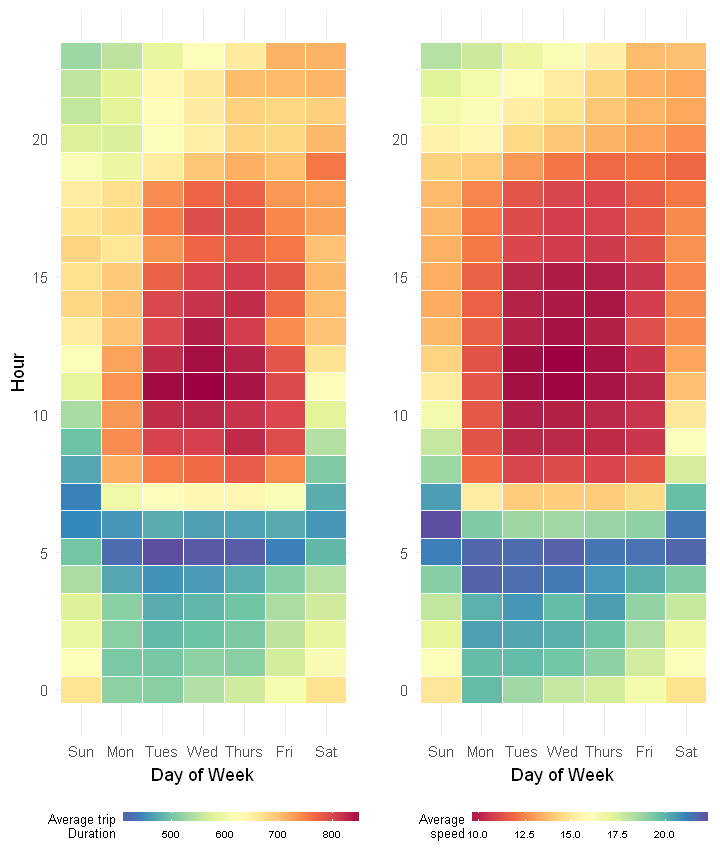

In [47]:
n=3.5
options(repr.plot.width=21/n, repr.plot.height=25/n) #Graph sizing in jupyter,for rstudio is not required

hm_palette <- colorRampPalette(rev(brewer.pal(11, 'Spectral')), space='Lab')  

p1<- data %>% 
    filter(dataset=="train") %>%
    group_by(weekday, hour) %>% 
    summarise(trip_duration=mean(trip_duration, na.rm=TRUE)) %>% 
    ungroup %>%
    ggplot(aes(x=weekday, y=hour)) +
    geom_tile(aes(fill=trip_duration), colour="white") + 
    scale_fill_gradientn(colours=hm_palette(100)) +
    labs(x="Day of Week", y="Hour",fill="Average trip\nDuration") +
    theme_minimal() +
    theme(legend.title=element_text(size=8),
        legend.title.align=1,
        legend.text=element_text(size=6),
        legend.position="bottom",
        legend.key.size=unit(0.2, "cm"),
        legend.key.width=unit(1, "cm"))

p2<- data %>% 
    filter(dataset=="train") %>%
    group_by(weekday, hour) %>% 
    summarise(speed=mean(speed, na.rm=TRUE)) %>% 
    ungroup %>%
    ggplot(aes(x=weekday, y=hour)) +
    geom_tile(aes(fill=speed), colour="white") + 
    scale_fill_gradientn(colours=rev(hm_palette(100))) +
    labs(x="Day of Week", y="",fill="Average\nspeed") +
    theme_minimal() +
    theme(legend.title=element_text(size=8),
        legend.title.align=1,
        legend.text=element_text(size=6),
        legend.position="bottom",
        legend.key.size=unit(0.2, "cm"),
        legend.key.width=unit(1, "cm"))

layout <- matrix(c(1,2),1,2,byrow=FALSE)
multiplot(p1, p2, layout=layout)

# 5. Weather conditions

## 5.1 Weather conditions trougouht the year
The weather has the potential to influence the transportation choices of passengers. An interesting example of this is the 2016 blizzard which occurred from January 22 to January 24, 2016. This storm was remembered as one of the most powerful in the recorded in the east part of the country. New York City experienced a snowfall of more than 60 cm causing hundreds of incidents across the affected region (McGurty, 2016).

During the storm, a state of emergency was declared throughout ten states and federal, state and local offices remained closed.  Transit was restricted by the road conditions which caused a dramatic decrease in taxi rides as observed in figure 4.11. 


Warning message:
"The plyr::rename operation has created duplicates for the following name(s): (`size`)"Warning message:
"The plyr::rename operation has created duplicates for the following name(s): (`size`)"Warning message:
"The plyr::rename operation has created duplicates for the following name(s): (`size`)"

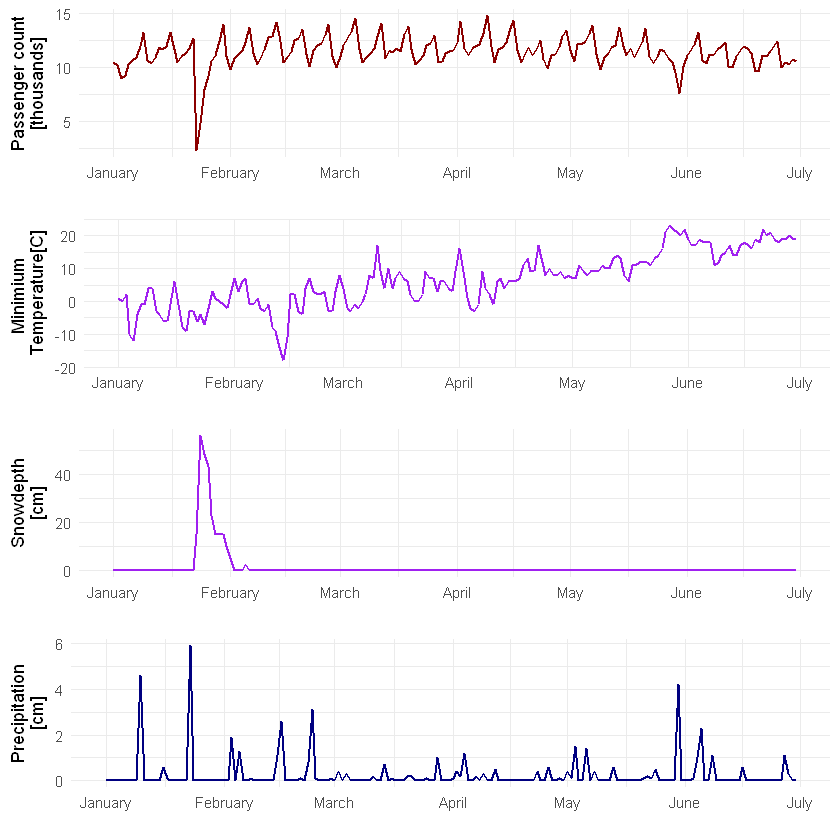

In [74]:
p1 <- data %>%
  group_by(date) %>%
  summarise(pc = sum(passenger_count)/1000)%>%
  ggplot(aes(date, pc)) +
  scale_x_date(date_breaks = "1 month",  
               labels = date_format("%B")) +
  geom_line(size=0.75,color="darkred") +
  theme_minimal() +
  theme(legend.position = "none", axis.title = element_text(size=11))+
  labs(x = "", y = "Passenger count\n[thousands]") 

p2 <- data %>%
  group_by(date) %>%
  ggplot(aes(date, minTemp)) +
  scale_x_date(date_breaks = "1 month",  
               labels = date_format("%B")) +
  theme_minimal() +
  theme(legend.position = "none", axis.title = element_text(size=11))+
  geom_line(size=0.75,color = "purple", size = 1.5) +
  labs(x = "", y = "Minimium \nTemperature[C]")


p3 <- data %>%
  group_by(date) %>%
  summarise(snowdepth = mean(snowdepth)) %>%
  ggplot(aes(date, snowdepth)) +
  scale_x_date(date_breaks = "1 month",  
               labels = date_format("%B")) +
  theme_minimal() +
  theme(legend.position = "none", axis.title = element_text(size=11))+
  geom_line(size=0.75,color = "purple", size = 1.5) +
  labs(x = "", y = "Snowdepth\n[cm]")

p4 <- data %>%
  group_by(date) %>%
  summarise(precipitation = median(precipitation)) %>%
  ggplot(aes(date, precipitation)) +
  scale_x_date(date_breaks = "1 month",  
               labels = date_format("%B")) +
  theme_minimal() +
  theme(legend.position = "none", axis.title = element_text(size=11))+
  geom_line(size=0.75,color = "navyblue", size = 1.5) +
  labs(x = "", y = "Precipitation\n[cm]")

options(repr.plot.width=7, repr.plot.height=7)
layout <- matrix(c(1,2,3,4),4,1,byrow=FALSE)
multiplot(p1, p2,p3,p4, layout=layout)